In [1]:
# biblioteki
%pip install seaborn
import pandas as pd
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pywaffle import Waffle

You should consider upgrading via the 'c:\Users\marta\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Collecting seaborn



In [2]:
# wczytanie danych 
df = pd.read_csv("https://raw.githubusercontent.com/vieczorkamil/Spotify_top_songs_EDA/master/data/Spotify%202010%20-%202019%20Top%20100.csv")
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [3]:
# Informacje o typie danych w zestawie
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [4]:
sns.set_style("darkgrid")

Najpopularniejsze gatunki -> TODO: poprawić wygląd

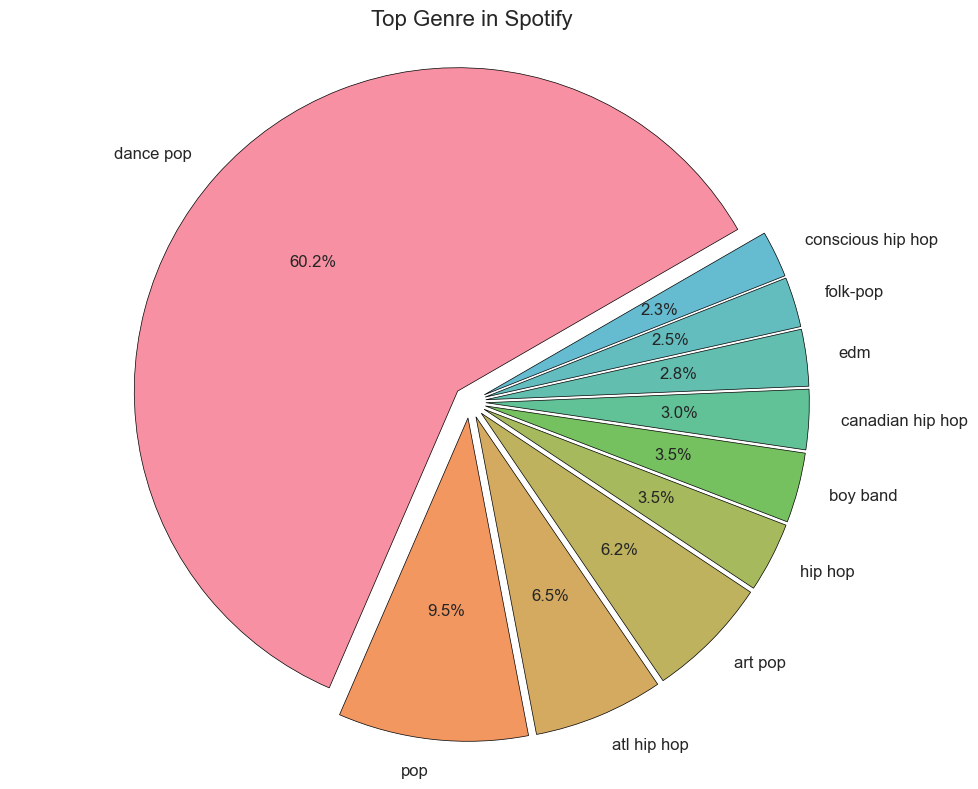

In [60]:
# wybierzmy tylko 10 najlepszych gatunków muzycznych
top_genres = df['top genre'].value_counts().head(10)

# funkcja zwracająca odcień koloru
def get_color(value):
    color = sns.color_palette('husl', 15)[top_genres.index.get_loc(value)]
    return sns.light_palette(color, n_colors=5)[-2]

# tworzenie wykresu kołowego
plt.figure(figsize=(10, 8))
plt.title('Top Genre in Spotify', fontsize=16)

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

colors = [get_color(g) for g in top_genres.index]
plt.pie(top_genres, labels=top_genres.index, explode=explode, autopct='%1.1f%%', colors=colors, startangle=30, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})

plt.axis('equal')
plt.show()



Analiza typów wykonawców -> TODO: poprawić wygląd



C:\Users\marta\AppData\Local\Temp\ipykernel_29568\2020809521.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



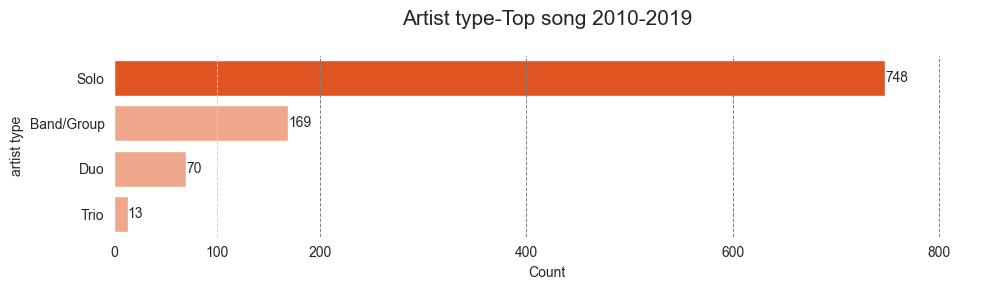

In [94]:
# Analiza typów wykonawców

plt.figure(figsize=(10,3))
plt.title('Artist type-Top song 2010-2019\n', fontsize=15)
ax=sns.countplot(data=df, y='artist type', palette=['orangered',"lightsalmon","lightsalmon","lightsalmon"], order=df['artist type'].value_counts().index[:])
# ax=sns.countplot(data=df, y='artist type', order=df['artist type'].value_counts().index[:], palette=sns.color_palette("Blues_r", n_colors=6))
ax.set_facecolor('white')
ax.set_xlabel("Count", )

ax.axvline(x=100, color='lightgray', linestyle='--', linewidth=0.7)
ax.axvline(x=200, color='gray', linestyle='--', linewidth=0.7)
ax.axvline(x=400, color='gray', linestyle='--', linewidth=0.7)
ax.axvline(x=600, color='gray', linestyle='--', linewidth=0.7)
ax.axvline(x=800, color='gray', linestyle='--', linewidth=0.7)

ax.set_xticklabels([0, 100, 200, None, 400, None, 600, None, 800])

for i in ax.containers:
    ax.bar_label(i)

Udziałtypów wykonawców (solo, duet, trio, zespół) w latach -? TODO: chyba git, troszkę poprawić wygląd

In [105]:
colors = plotly.colors.qualitative.Bold

grouped = df.groupby(['top year', 'artist type']).size().reset_index(name='counts')

top_year = [2010, 2010, 2010, 2011, 2011, 2011, 2012, 2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019]
# sortowanie wyniku według roku i typu artysty
sorted_grouped = grouped.sort_values(['top year', 'artist type'])

fig = px.bar(sorted_grouped, x='top year', y='counts',
             color='artist type', barmode='stack',
             text=sorted_grouped['artist type'],  # Add Percent Sign
             color_discrete_sequence=colors)
fig.update_layout(width=1500, height=600, showlegend=False, title='Percentage of artists of each type in years 2010-2019', title_x=0.5, xaxis={'tickmode': 'array',
                         'tickvals': sorted_grouped['top year'].unique()},plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')


# Don't forget to remove from update_traces
fig.update_traces(textfont_size=12)



fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Top wykonawcy -> TODO: poprawić wygląd

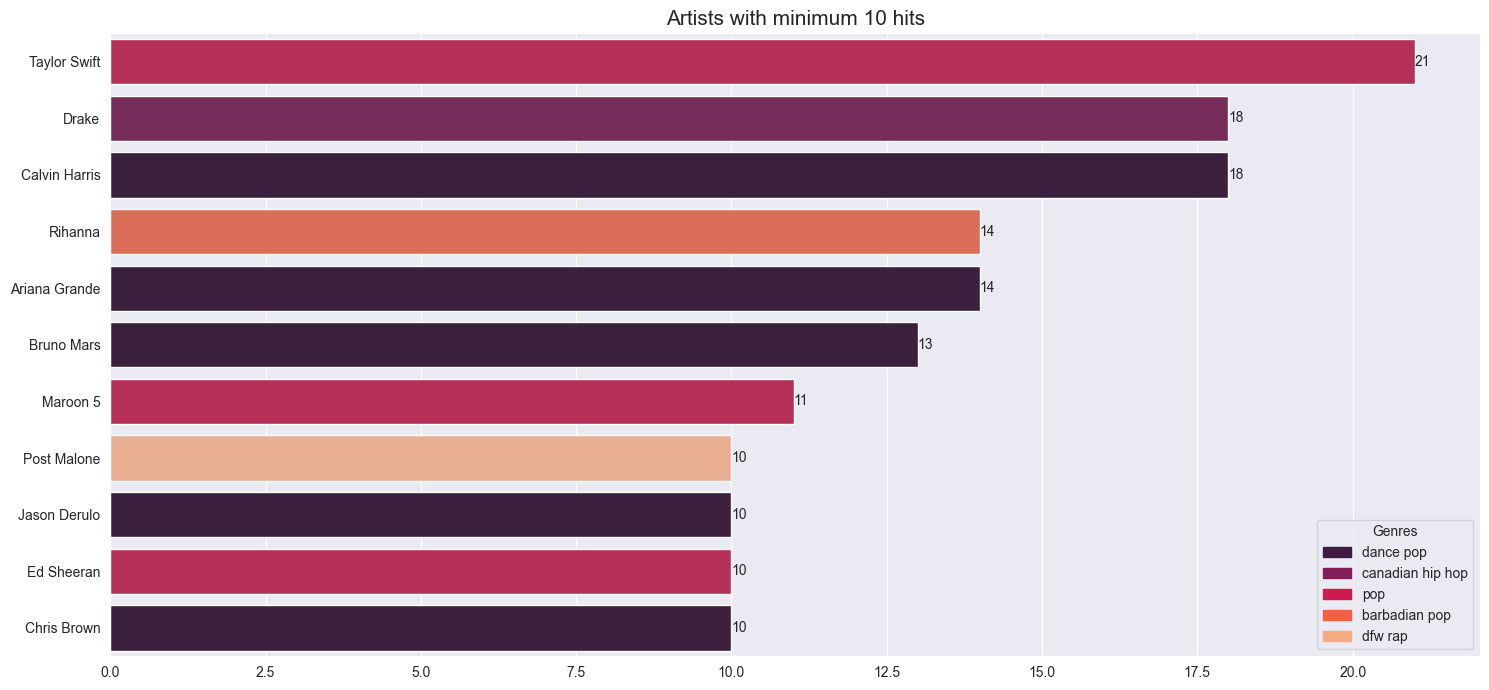

In [106]:
index = df['artist'].value_counts()[df['artist'].value_counts() >= 10].index.tolist()
val = df['artist'].value_counts()[df['artist'].value_counts() >= 10].values.tolist()
genres = df.loc[df['artist'].isin(index), 'top genre'].unique().tolist()
n_genres = len(genres)

# palette = sns.color_palette('Set2', n_genres)
palette = sns.color_palette("rocket", n_genres)
colors = {genre: color for genre, color in zip(genres, palette)}
colors_list = [colors[df.loc[df['artist'] == artist, 'top genre'].unique()[0]] for artist in index]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=val, y=index, palette=colors_list)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Artists with minimum 10 hits', fontsize=15)

# Dodanie legendy na kolory
handles = [mpatches.Patch(color=color, label=genre) for genre, color in colors.items() if genre in df['top genre'].unique()]
plt.legend(handles=handles, loc='lower right', title='Genres')

plt.show()

Tu jest inna wersja tego wykresu co wyżej, bez uwzględnienia gatunku, ale fajnie wygląda

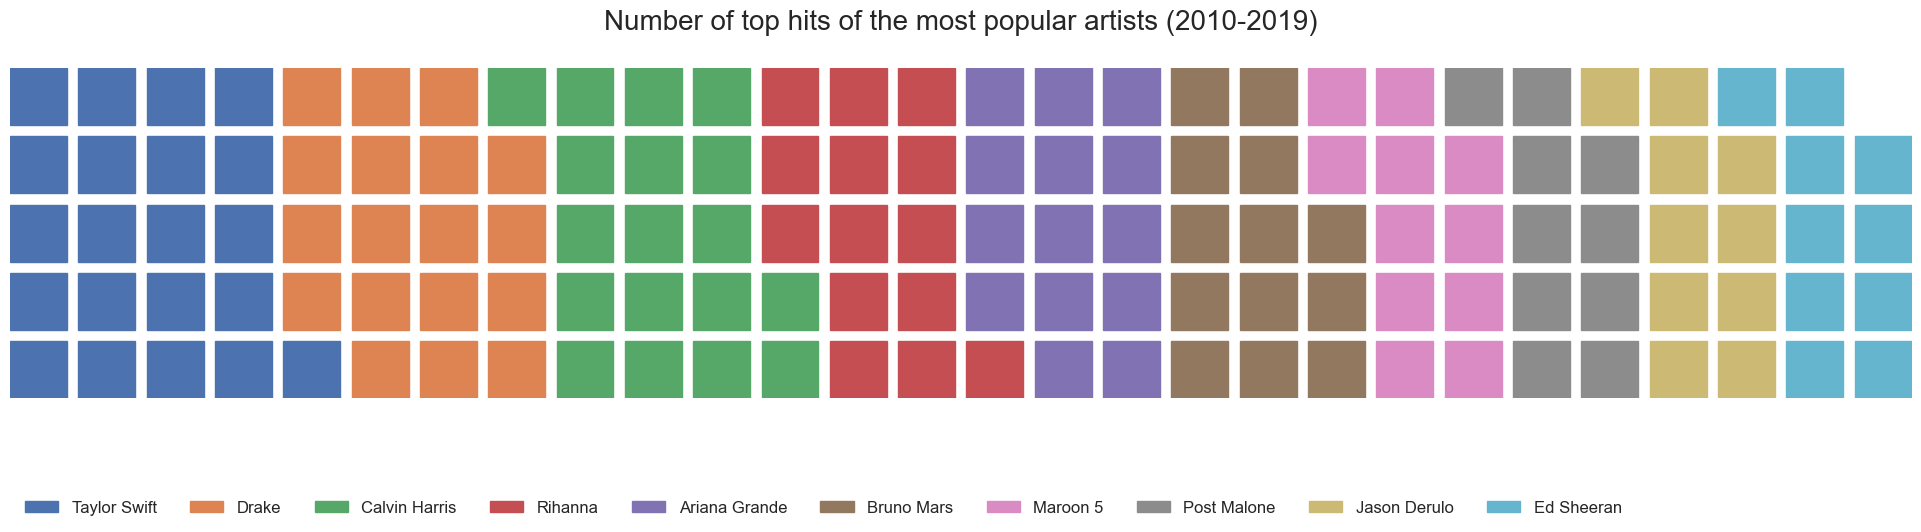

In [132]:
# Zliczenie liczby wystąpień każdego artysty i ograniczenie do 10 najpopularniejszych
top_artists = df['artist'].value_counts().nlargest(10)

# Utworzenie wykresu Waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=5, 
    values=top_artists, 
    # labels=[f"{k}" for k in top_artists.keys()],
    legend={
        'labels': [f"{k}" for k in top_artists.keys()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(top_artists),
        'framealpha': 0,
        'fontsize': 12,
    },
    figsize=(20,20),
    colors=sns.color_palette("deep", len(top_artists.keys()))
)

# Dodanie tytułu
plt.title('Number of top hits of the most popular artists (2010-2019)\n', fontdict={'fontsize': 20})

# Wyświetlenie wykresu
plt.show()


TU FAJNY POMYSŁ NA WYKRES ANE W KOŁOWYM OBRACAJĄ SIĘ ETYKIETY WIEC NIE MOŻE BYĆ TODO: POPRAWIĆ WYGLĄD LUB ZMIENIĆ TYP WYKRESU

Rozkład tempa piosenek (bpm)

WYDAJE MI SIĘ ŻE JEST GIT

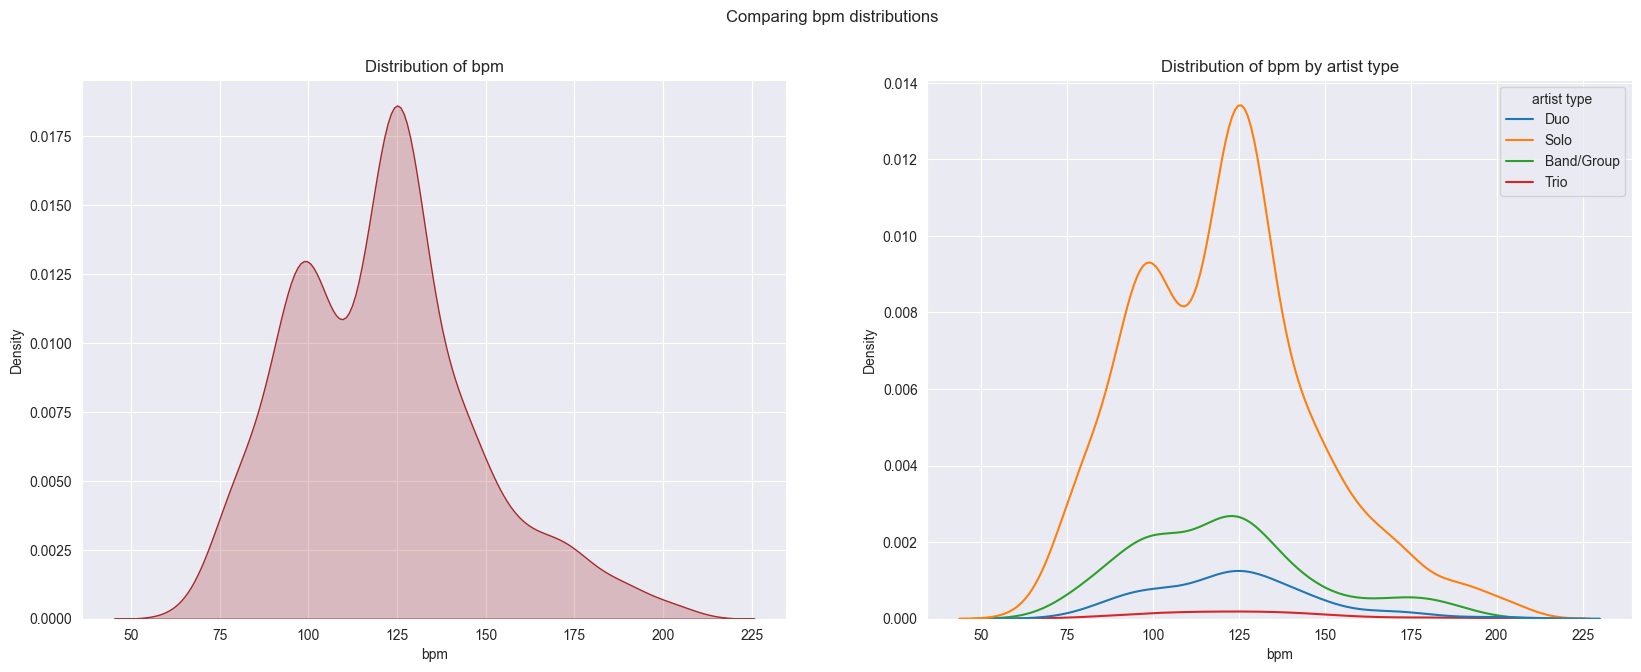

In [ ]:
# subplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# pierwszy wykres
sns.kdeplot(df['bpm'], color='brown', fill=True, ax=axs[0])
axs[0].set_title('Distribution of bpm')

# drugi wykres
sns.kdeplot(x="bpm", hue="artist type", data=df, ax=axs[1])
axs[1].set_title('Distribution of bpm by artist type')

fig.suptitle('Comparing bpm distributions')

# wyświetlamy wykres
plt.show()

Nastrój piosenek w zależności od różnych piosenek (rozkład)

WYDAJE SIĘ BYĆ GIT

In [ ]:
# Zamiana wartości w kolumnie 'val'
df['mood'] = df['val'].apply(lambda x: 1 if x >= 45 else 0)

# Wyświetlenie pierwszych pięciu wierszy zestawu danych
df['mood'].value_counts()[1]

596

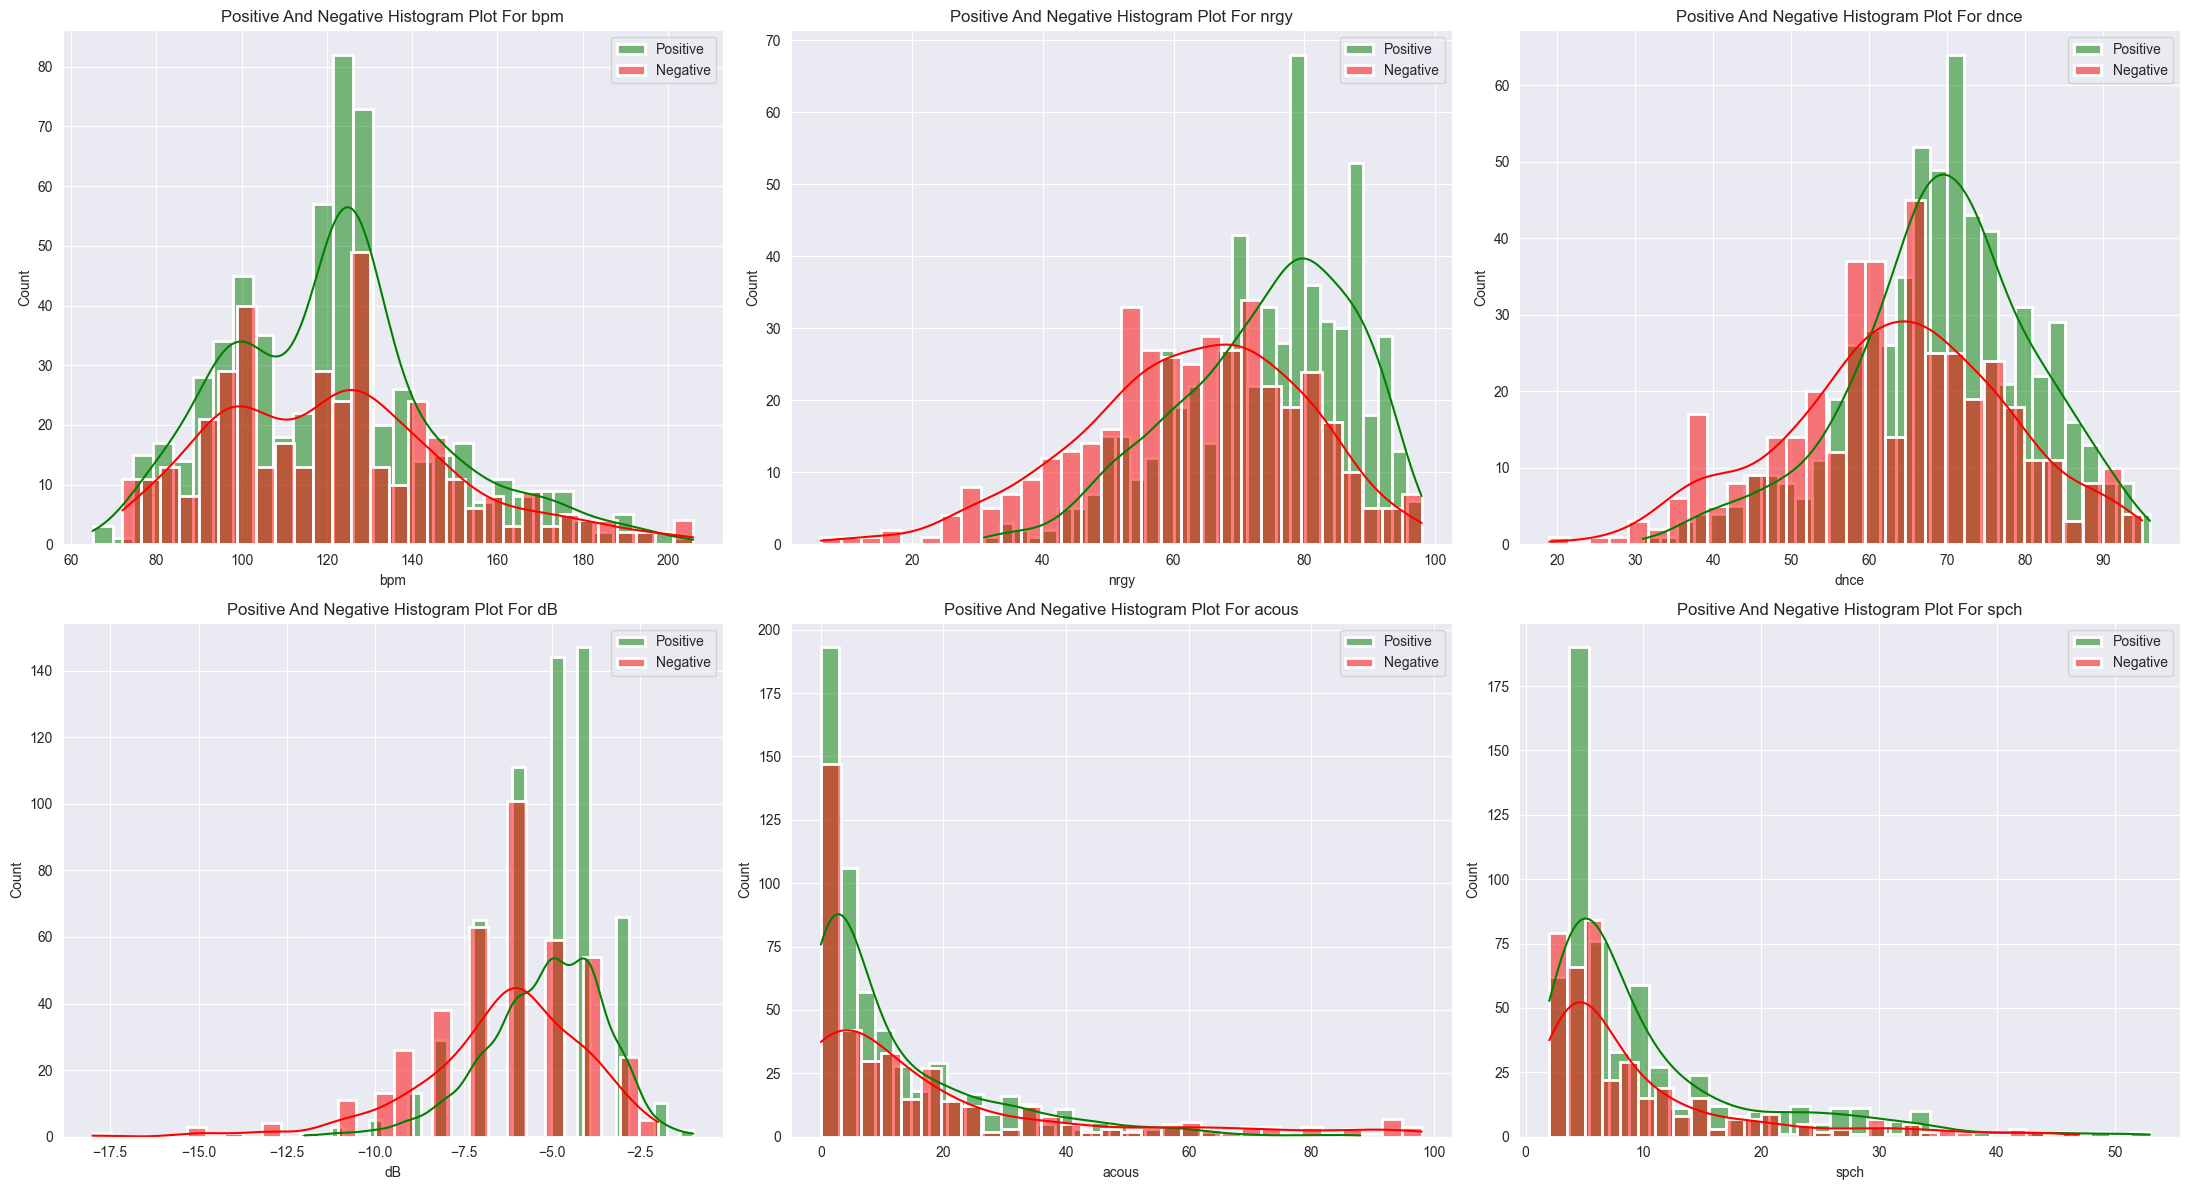

In [ ]:
# Zdefiniowanie kolumn zainteresowania
interest_feature_cols = ["bpm", "nrgy", "dnce", "dB", "acous", "spch"]

# Tworzenie siatki subplotów 2x3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 12))

# Iteracja po każdym elemencie siatki subplotów
for idx, ax in enumerate(axes.flatten()):

    # Wybieranie kolumny zainteresowania
    feature_col = interest_feature_cols[idx]
    
    # Wyodrębnianie danych pozytywnych i negatywnych
    pos_data = df[df["mood"] == 1][feature_col]
    neg_data = df[df["mood"] == 0][feature_col]

    # Rysowanie histogramów z linią gęstości dla danych pozytywnych i negatywnych na konkretnym subplotie
    sns.histplot(pos_data, bins=30, label="Positive", color="green", kde=True, linewidth=2, ax=ax)
    sns.histplot(neg_data, bins=30, label="Negative", color="red", kde=True, linewidth=2, ax=ax)
    

    # Dodawanie tytułu i legendy do konkretnego subplotu
    ax.set_title(f"Positive And Negative Histogram Plot For {feature_col}")
    ax.legend(loc="upper right")

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

Głośność piosenki a jej taneczność ->dB/danceability TODO: 

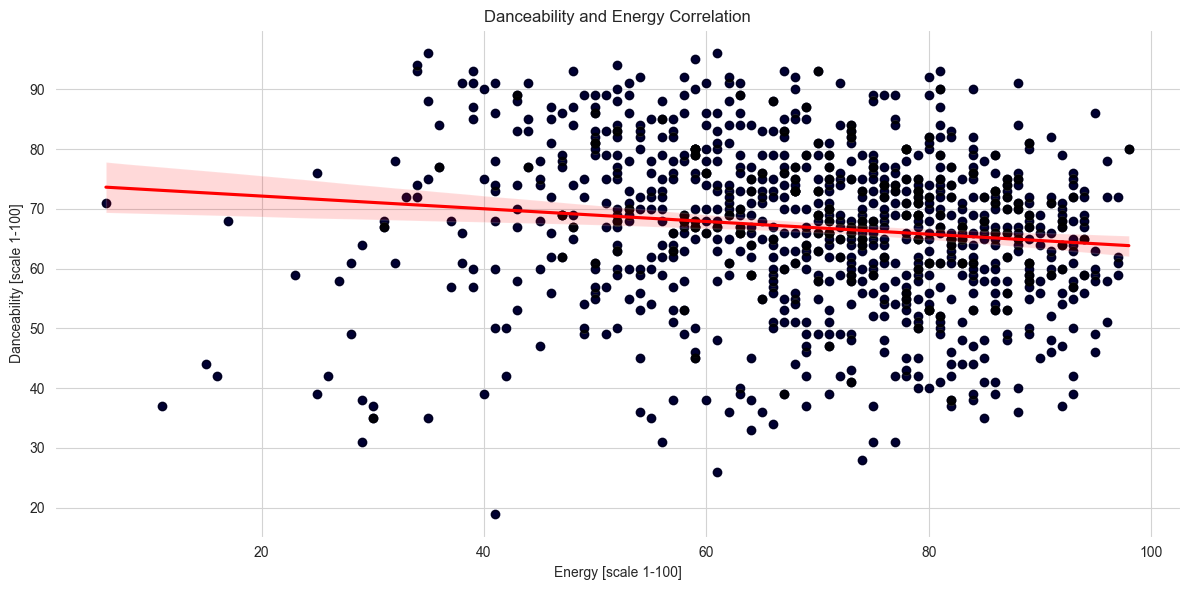

In [141]:
plt.figure(figsize = (12,6))
ax = sns.scatterplot(data = df,
                x = 'nrgy',
                y = 'dnce',
                s = 50,
                color='blue' );     # size of dots

plt.title('dB vs danceability', fontsize = 15)
sns.regplot(data=df, y='dnce', x='nrgy', scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title='Danceability and Energy Correlation')
plt.xlabel('Energy [scale 1-100]')
plt.ylabel('Danceability [scale 1-100]')
ax.set_facecolor('white')
ax.grid(visible=True, color='lightgray')

Średni czas dochodzenia do popularności

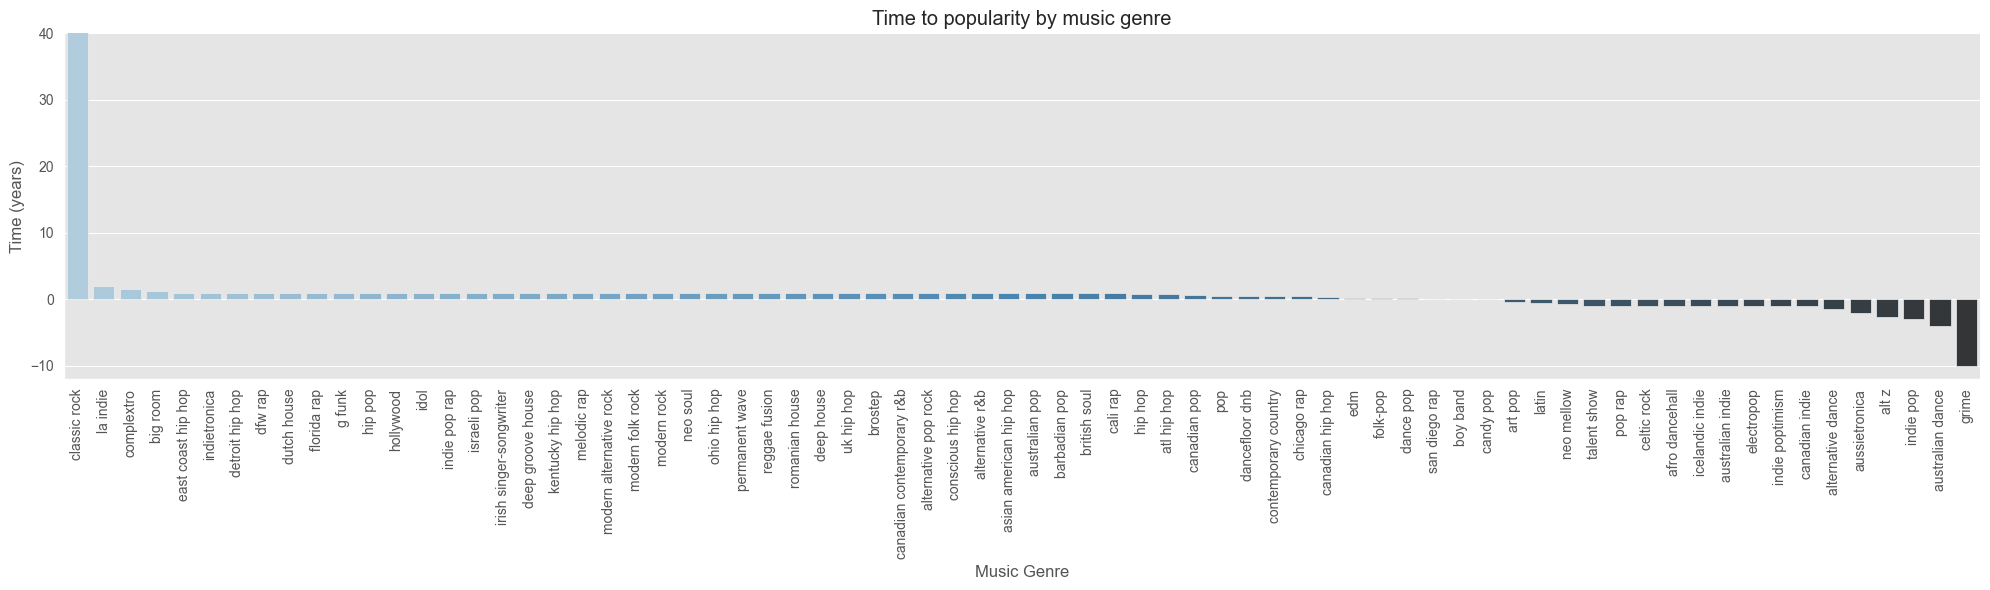

In [184]:
df['czas_dochodzenia_do_popularnosci'] = df['top year'] - df['year released']
df_nonzero = df.loc[df['czas_dochodzenia_do_popularnosci'] != 0]

# przygotowanie danych do wykresu
df_plot = df_nonzero.groupby('top genre')['czas_dochodzenia_do_popularnosci'].mean().reset_index()
df_sorted = df_plot.sort_values(by='czas_dochodzenia_do_popularnosci', ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(data=df_sorted, x='top genre', y='czas_dochodzenia_do_popularnosci', palette='Blues_d')
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Music Genre')
plt.ylabel('Time (years)')
plt.title('Time to popularity by music genre')

plt.ylim(-12,40)
plt.show()

plt.figure(figsize=(20,6))
sns.barplot(data=df_sorted, x='top genre', y='czas_dochodzenia_do_popularnosci', palette='Blues_d')
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Music Genre')
plt.ylabel('Time (years)')
plt.title('Time to popularity by music genre')

plt.ylim(-2.5,4)
plt.show()

#MS TODO: Tu można dać powiększenie (-4,4), żeby zobaczyć lepiej co sie dzieje na wykresie

Scatterplot roznych rzeczy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


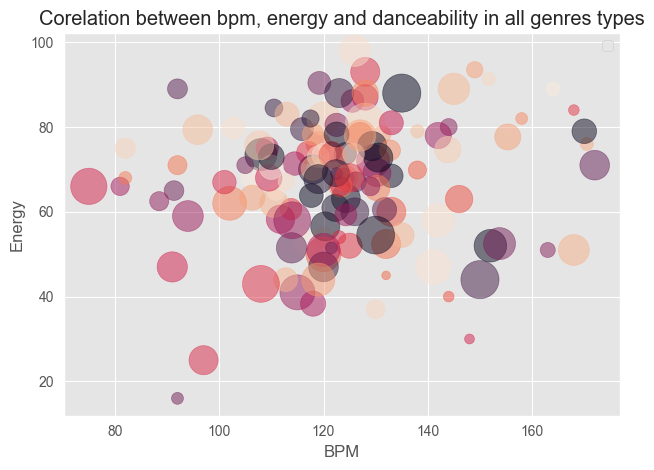

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# wczytanie danych z pliku CSV
df = pd.read_csv('https://raw.githubusercontent.com/vieczorkamil/Spotify_top_songs_EDA/master/data/Spotify%202010%20-%202019%20Top%20100.csv')

# grupowanie danych po gatunku muzycznym
df_group = df.groupby(by="top genre")

# definicja kolorów dla gatunków muzycznych
colors = np.random.rand(len(df_group))

# rysowanie scatterplot
plt.scatter(df_group['bpm'].mean(), df_group['nrgy'].mean(), s=df_group['dnce'].mean()**3/1000, alpha=0.5, c=colors)
plt.xlabel('BPM')
plt.ylabel('Energy')
plt.title('Corelation between bpm, energy and danceability in all genres types')

# dodanie legendy
plt.legend()
plt.show()
#MS TODO: DODAĆ LEGENDĘ